In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('machine.data_update.csv')

X = data.drop('PRP', axis=1)
y = data['PRP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

param_grid = {
    'regressor__copy_X': [True, False],
    'regressor__fit_intercept': [True, False]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f'Best Model: {best_model}')

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
print(f'Cross Validation R^2 Scores: {cv_scores}')
print(f'Mean CV R^2: {np.mean(cv_scores):.2f} +/- {np.std(cv_scores):.2f}')


Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'ERP'], dtype='object'))])),
                ('regressor', LinearRegression())])
Mean Squared Error (MSE): 2370.10
R^2 Score: 0.95
Cross Validation R^2 Scores: [0.84333007 0.69067302 0.87760198 0.87717886 0.87808498]
Mean CV R^2: 0.83 +/- 0.07


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = pd.read_csv('machine.data_update.csv')

X = data.drop('PRP', axis=1)
y = data['PRP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

param_grid = {
    'regressor__copy_X': [True, False],
    'regressor__fit_intercept': [True, False]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f'Best Model: {best_model}')

y_train_pred = best_model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f'Train Mean Squared Error (MSE): {train_mse:.2f}')
print(f'Train Mean Absolute Error (MAE): {train_mae:.2f}')
print(f'Train R^2 Score: {train_r2:.2f}')

y_test_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Test Mean Squared Error (MSE): {test_mse:.2f}')
print(f'Test Mean Absolute Error (MAE): {test_mae:.2f}')
print(f'Test R^2 Score: {test_r2:.2f}')

cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
print(f'Cross Validation R^2 Scores: {cv_scores}')
print(f'Mean CV R^2: {np.mean(cv_scores):.2f} +/- {np.std(cv_scores):.2f}')


Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'ERP'], dtype='object'))])),
                ('regressor', LinearRegression())])
Train Mean Squared Error (MSE): 1529.02
Train Mean Absolute Error (MAE): 23.23
Train R^2 Score: 0.92
Test Mean Squared Error (MSE): 2370.10
Test Mean Absolute Error (MAE): 31.41
Test R^2 Score: 0.95
Cross Validation R^2 Scores: [0.84333007 0.69067302 0.87760198 0.87717886 0.87808498]
Mean CV R^2: 0.83 +/- 0.07


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = pd.read_csv('machine.data_update.csv')


X = data.drop(columns=['PRP'])
y = data['PRP']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])


model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(random_state=42))])


param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R^2 Score: {r2:.2f}')


Mean Squared Error: 6466.98
Mean Absolute Error: 36.02
R^2 Score: 0.87


C:\Users\user\AppData\Local\Temp\ipykernel_11544\233660828.py:85: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  results.replace('-', np.nan, inplace=True)


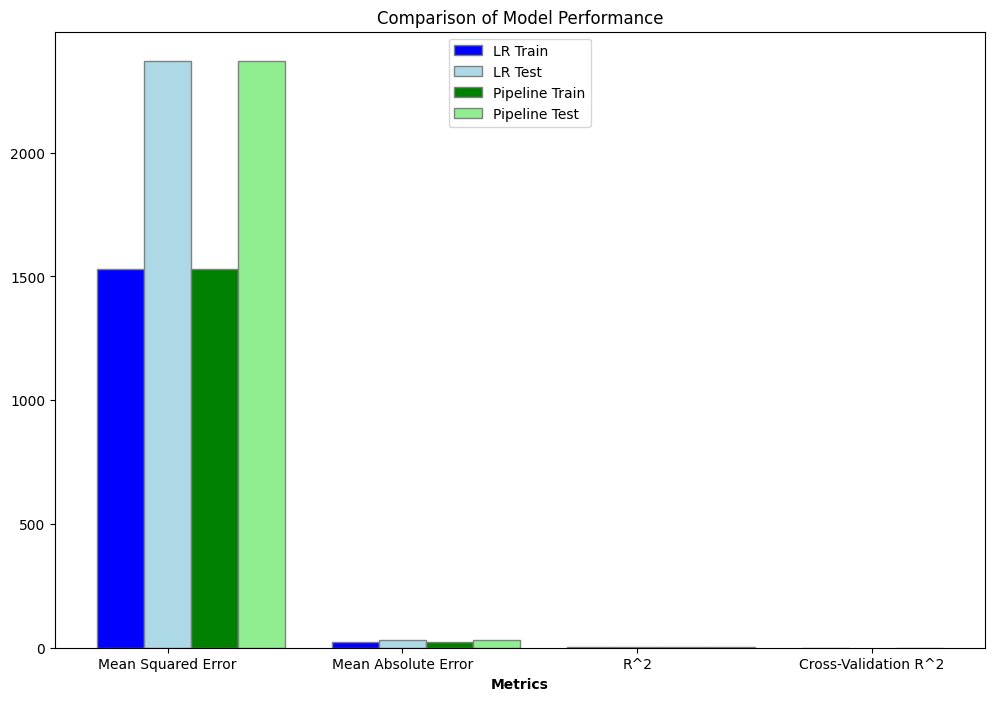

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = pd.read_csv('machine.data_update.csv')

X = data.drop('PRP', axis=1)
y = data['PRP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])


model_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression()) 
])

param_grid = {
    'regressor__copy_X': [True, False],
    'regressor__fit_intercept': [True, False]
}

grid_search = GridSearchCV(model_rf, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

model_lr.fit(X_train, y_train)
y_train_pred_lr = model_lr.predict(X_train)
y_test_pred_lr = model_lr.predict(X_test)

mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)
mae_train_lr = mean_absolute_error(y_train, y_train_pred_lr)
mae_test_lr = mean_absolute_error(y_test, y_test_pred_lr)
r2_train_lr = r2_score(y_train, y_train_pred_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)

best_model_rf = grid_search.best_estimator_
best_model_rf.fit(X_train, y_train)
y_train_pred_rf = best_model_rf.predict(X_train)
y_test_pred_rf = best_model_rf.predict(X_test)

mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)


cv_scores_lr = cross_val_score(model_lr, X, y, cv=5, scoring='r2')
cv_scores_rf = cross_val_score(best_model_rf, X, y, cv=5, scoring='r2')

results = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'Mean Absolute Error', 'R^2', 'Cross-Validation R^2'],
    'Linear Regression Train': [mse_train_lr, mae_train_lr, r2_train_lr, np.mean(cv_scores_lr)],
    'Linear Regression Test': [mse_test_lr, mae_test_lr, r2_test_lr, '-'],
    'Pipeline Best Estimator Train': [mse_train_rf, mae_train_rf, r2_train_rf, np.mean(cv_scores_rf)],
    'Pipeline Best Estimator Test': [mse_test_rf, mae_test_rf, r2_test_rf, '-']
})


results.replace('-', np.nan, inplace=True)

plt.figure(figsize=(12, 8))

barWidth = 0.2
r1 = np.arange(len(results))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.bar(r1, results['Linear Regression Train'], color='blue', width=barWidth, edgecolor='grey', label='LR Train')
plt.bar(r2, results['Linear Regression Test'], color='lightblue', width=barWidth, edgecolor='grey', label='LR Test')
plt.bar(r3, results['Pipeline Best Estimator Train'], color='green', width=barWidth, edgecolor='grey', label='Pipeline Train')
plt.bar(r4, results['Pipeline Best Estimator Test'], color='lightgreen', width=barWidth, edgecolor='grey', label='Pipeline Test')

plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(results))], results['Metric'])
plt.legend()
plt.title('Comparison of Model Performance')
plt.show()
